In [1]:
import cv2
import matplotlib.pyplot as plt

Image captured automatically.


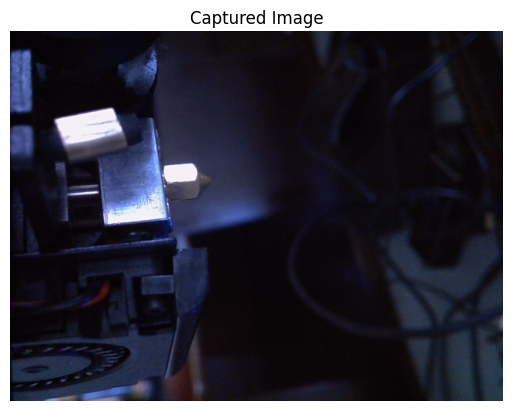

In [ ]:
# Function to capture a single image from the camera automatically
def capture_image():
    """Capture an image from the camera automatically."""
    camera = cv2.VideoCapture(0)  # Open the camera (0 is the default camera)
    if not camera.isOpened():
        print("Error: Camera not found.")
        return None
    
    ret, frame = camera.read()
    if not ret:
        print("Error: Unable to read from camera.")
        camera.release()
        return None

    camera.release()
    
    print("Image captured automatically.")
    return frame

captured_image = capture_image()

if captured_image is not None:
    captured_image_rgb = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
    

    cte_image = captured_image_rgb  
    plt.imshow(captured_image_rgb)
    plt.axis('off')
    plt.title("Captured Image")
    plt.show()
else:
    print("No image captured.")


Using cte_image as the input image.
Image cropped to ROI: (63, 67, 3)
Image resized to 320x320: (320, 320, 3)
Image rotated: (320, 320, 3)
Image resized to 224x224: (224, 224, 3)
Image normalized.


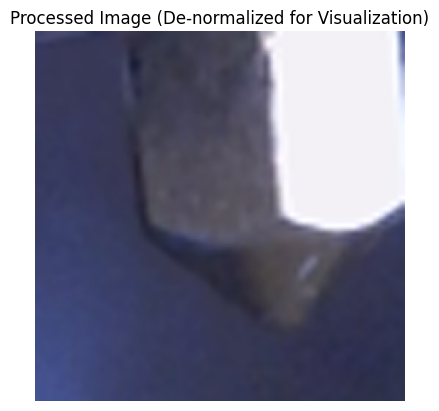

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


CROP_SIZE = 320
FINAL_SIZE = 224
ROI = (207, 173, 274, 236) 

def process_image(image, roi):
    """Apply ROI cropping, resizing, rotation, enhancement, and normalization."""
    x_min, y_min, x_max, y_max = roi

    cropped = image[y_min:y_max, x_min:x_max]
    print(f"Image cropped to ROI: {cropped.shape}")
    
    cropped_resized = cv2.resize(cropped, (CROP_SIZE, CROP_SIZE), interpolation=cv2.INTER_CUBIC)
    print(f"Image resized to {CROP_SIZE}x{CROP_SIZE}: {cropped_resized.shape}")

    rotated = cv2.rotate(cropped_resized, cv2.ROTATE_90_CLOCKWISE)
    print(f"Image rotated: {rotated.shape}")

    final_resized = cv2.resize(rotated, (FINAL_SIZE, FINAL_SIZE), interpolation=cv2.INTER_CUBIC)
    print(f"Image resized to {FINAL_SIZE}x{FINAL_SIZE}: {final_resized.shape}")

    normalized_image = normalize_image(final_resized)
    print("Image normalized.")

    return normalized_image

def normalize_image(image):
    """Normalize image by scaling to [0, 1] and standardizing with mean/std."""
    image = image / 255.0

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    image[:, :, 0] = (image[:, :, 0] - mean[0]) / std[0] 
    image[:, :, 1] = (image[:, :, 1] - mean[1]) / std[1]  
    image[:, :, 2] = (image[:, :, 2] - mean[2]) / std[2]  

    return image

def denormalize_image(image):
    """De-normalize the image for visualization."""
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    image[:, :, 0] = (image[:, :, 0] * std[0]) + mean[0] 
    image[:, :, 1] = (image[:, :, 1] * std[1]) + mean[1]  
    image[:, :, 2] = (image[:, :, 2] * std[2]) + mean[2]  

    image = np.clip(image, 0, 1)

    return image


if 'cte_image' in globals():
    original_image = cte_image 
    print("Using cte_image as the input image.")
else:
    print("Error: cte_image is not defined. Please capture an image first.")
    original_image = None


if original_image is not None:
    processed_image = process_image(original_image, ROI)


    visual_image = denormalize_image(processed_image)

    plt.imshow(visual_image)
    plt.axis('off')
    plt.title("Processed Image (De-normalized for Visualization)")
    plt.show()
else:
    print("No image to process.")


In [ ]:
import cv2
import os
import time
from datetime import datetime


image_capture_interval = 0.4  
base_directory = "C:\\Users\\Charbel\\Desktop\\OctoRest\\Data"  #Replace


CROP_SIZE = 320
FINAL_SIZE = 224
ROI = (207, 173, 274, 236)  


os.makedirs(base_directory, exist_ok=True)


def get_next_folder_name(base_directory):
    """Determine the next folder name based on the existing folders."""
    folders = [f for f in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, f)) and f.startswith("print")]
    if not folders:
        return "print0" 
    latest_folder = max(folders, key=lambda x: int(x.replace("print", "")))
    next_folder_number = int(latest_folder.replace("print", "")) + 1
    return f"print{next_folder_number}"

batch_folder = get_next_folder_name(base_directory)
output_directory = os.path.join(base_directory, batch_folder)
os.makedirs(output_directory, exist_ok=True)

camera = cv2.VideoCapture(0)
if not camera.isOpened():
    print("Error: Camera not found.")
    exit()


def process_image(image, roi):
    """Apply ROI cropping, resizing, and rotating to the image."""
    x_min, y_min, x_max, y_max = roi


    cropped = image[y_min:y_max, x_min:x_max]

    cropped_resized = cv2.resize(cropped, (CROP_SIZE, CROP_SIZE), interpolation=cv2.INTER_CUBIC)
    rotated = cv2.rotate(cropped_resized, cv2.ROTATE_90_CLOCKWISE)
    final_resized = cv2.resize(rotated, (FINAL_SIZE, FINAL_SIZE), interpolation=cv2.INTER_CUBIC)

    return final_resized


try:
    img_num = 0 
    print(f"Starting image capture. Images will be saved in: {output_directory}. Press CTRL+C to stop manually.")
    while True:
        ret, frame = camera.read()
        if not ret:
            print("Error: Unable to capture image.")
            break

        processed_image = process_image(frame, ROI)

        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        image_path = os.path.join(output_directory, f"image_{img_num}.jpg")
        cv2.imwrite(image_path, processed_image)

        print(f"Image {img_num} saved: {image_path}")

        img_num += 1
        time.sleep(image_capture_interval)

except KeyboardInterrupt:
    print(f"Stopping image capture. All images saved in: {output_directory}.")

finally:
    camera.release()


Starting image capture. Images will be saved in: C:\Users\Charbel\Desktop\OctoRest\Data\print4. Press CTRL+C to stop manually.


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
